In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.image import imread
import warnings 
import os
warnings.filterwarnings('ignore')

In [2]:
import tensorflow
from tensorflow.keras.preprocessing import image
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [3]:
cd /content/drive/MyDrive/Face Mask Detection

/content/drive/MyDrive/Face Mask Detection


In [4]:
ls

archive/  Facemask.zip


In [5]:
# !unzip Facemask.zip

In [6]:
train_path = '/content/drive/MyDrive/Face Mask Detection/archive/training'
test_path = '/content/drive/MyDrive/Face Mask Detection/archive/testing'

In [7]:
os.listdir(train_path + '/with_mask/')
mask = train_path + '/with_mask/' + 'with_mask_1858.jpg'

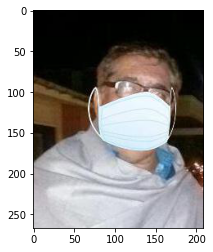

In [8]:
plt.imshow(imread(mask))

In [9]:
os.listdir(train_path + '/without_mask/')
without_mask = train_path + '/without_mask/' + 'without_mask_1856.jpg'

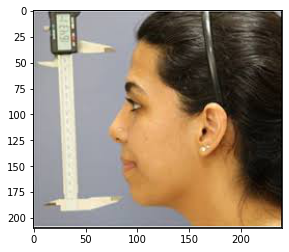

In [10]:
plt.imshow(imread(without_mask))

In [11]:
len(os.listdir(train_path + '/with_mask/'))

3126

In [12]:
len(os.listdir(train_path + '/without_mask/'))

3288

In [13]:
imread(mask).shape

(267, 209, 3)

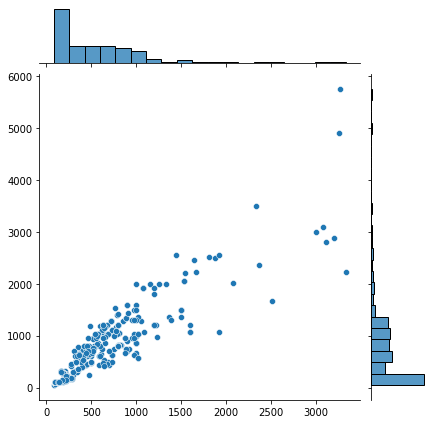

In [14]:
import seaborn as sns
dim1 = []
dim2 = []
for image in os.listdir(test_path + '/with_mask/'):
  img = imread(test_path + '/with_mask/' + image)
  d1, d2, colors = img.shape
  dim1.append(d1)
  dim2.append(d2)

sns.jointplot(dim1, dim2)

In [15]:
print(np.median(dim1))
print(np.median(dim2))

438.5
600.0


In [16]:
image_shape = (430, 600, 3)

In [17]:
train_data_gen = ImageDataGenerator(rotation_range=30, width_shift_range=0.2, height_shift_range=0.2, shear_range=0.2, zoom_range=0.4, horizontal_flip=True, rescale=1/255,)

In [18]:
test_data_gen = ImageDataGenerator(rescale=1/255)

In [19]:
training_set = train_data_gen.flow_from_directory(train_path, target_size=image_shape[:2], class_mode='binary', batch_size=32)
testing_set = test_data_gen.flow_from_directory(test_path, target_size=image_shape[:2], class_mode='binary', batch_size=32, shuffle=False)

Found 6414 images belonging to 2 classes.
Found 1080 images belonging to 2 classes.


In [20]:
training_set.class_indices

{'with_mask': 0, 'without_mask': 1}

In [21]:
next(training_set)[0].shape

(32, 430, 600, 3)

In [22]:
next(training_set)[1].shape

(32,)

In [23]:
model = Sequential()

model.add(Conv2D(32, kernel_size=(3,3), activation='relu', input_shape=image_shape))
model.add(MaxPooling2D())

model.add(Conv2D(64, kernel_size=(3,3), activation='relu',))
model.add(MaxPooling2D())

model.add(Conv2D(128, kernel_size=(3,3), activation='relu',))
model.add(MaxPooling2D())

model.add(Flatten())

model.add(Dense(128, activation='relu', ))
model.add(Dropout(0.5))

model.add(Dense(1, activation='sigmoid'))

In [24]:
early_stop = EarlyStopping(monitor='val_loss', patience=2, verbose=2)

In [25]:
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

In [26]:
model.fit(training_set, batch_size=32, epochs=15, callbacks=[early_stop], validation_data=testing_set, validation_batch_size=32)

Epoch 1/15
201/201 [==============================] - 1154s 6s/step - loss: 0.7080 - accuracy: 0.7293 - val_loss: 0.3438 - val_accuracy: 0.8667
Epoch 2/15
201/201 [==============================] - 359s 2s/step - loss: 0.4221 - accuracy: 0.8167 - val_loss: 0.3516 - val_accuracy: 0.8704
Epoch 3/15
201/201 [==============================] - 355s 2s/step - loss: 0.3954 - accuracy: 0.8304 - val_loss: 0.3270 - val_accuracy: 0.8833
Epoch 4/15
201/201 [==============================] - 355s 2s/step - loss: 0.3924 - accuracy: 0.8315 - val_loss: 0.3241 - val_accuracy: 0.8722
Epoch 5/15
201/201 [==============================] - 355s 2s/step - loss: 0.3785 - accuracy: 0.8407 - val_loss: 0.3125 - val_accuracy: 0.8685
Epoch 6/15
201/201 [==============================] - 355s 2s/step - loss: 0.3587 - accuracy: 0.8485 - val_loss: 0.3387 - val_accuracy: 0.8417
Epoch 7/15
201/201 [==============================] - 354s 2s/step - loss: 0.3491 - accuracy: 0.8536 - val_loss: 0.3936 - val_accuracy: 0.827

In [27]:
losses = pd.DataFrame(model.history.history)

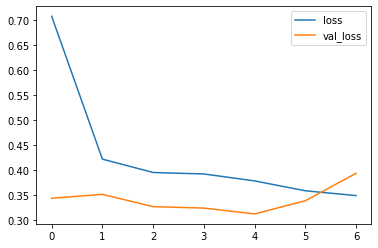

In [28]:
losses[['loss', 'val_loss']].plot()

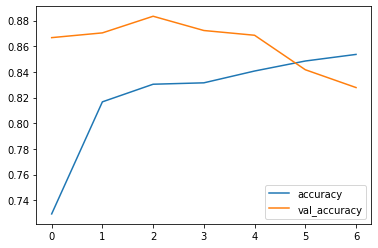

In [29]:
losses[['accuracy', 'val_accuracy']].plot()

In [30]:
model.evaluate(testing_set)

34/34 [==============================] - 11s 326ms/step - loss: 0.3936 - accuracy: 0.8278


[0.39363807439804077, 0.8277778029441833]

In [32]:
model.save('classifier.h5')

In [33]:
pred = model.predict(testing_set)

In [34]:
pred

array([[0.04678337],
       [0.45572045],
       [0.40694347],
       ...,
       [0.9624211 ],
       [0.96952564],
       [0.90852094]], dtype=float32)

In [35]:
testing_set.classes

array([0, 0, 0, ..., 1, 1, 1], dtype=int32)

In [36]:
predictions = pred > 0.5

In [37]:
from sklearn.metrics import classification_report,confusion_matrix

In [38]:
print(classification_report(testing_set.classes,predictions))

              precision    recall  f1-score   support

           0       0.89      0.74      0.81       540
           1       0.78      0.91      0.84       540

    accuracy                           0.83      1080
   macro avg       0.84      0.83      0.83      1080
weighted avg       0.84      0.83      0.83      1080



In [39]:
confusion_matrix(testing_set.classes,predictions)

array([[402, 138],
       [ 48, 492]])

In [85]:
os.listdir(train_path + '/with_mask/')
mask = train_path + '/with_mask/' + 'with_mask_1710.jpg'

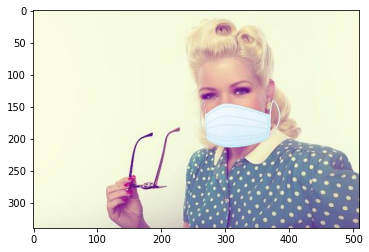

In [86]:
plt.imshow(imread(mask))

In [87]:
my_image = imread(mask)

In [88]:
type(my_image)

numpy.ndarray

In [89]:
my_image.shape

(340, 510, 3)

In [95]:
new_image = tensorflow.compat.v1.image.resize(
    my_image, (430, 600), method=tensorflow.image.ResizeMethod.BILINEAR, align_corners=False,
    preserve_aspect_ratio=False, name=None
)

In [97]:
new_image.shape

TensorShape([430, 600, 3])

In [100]:
new_image = np.expand_dims(new_image, axis=0, )

In [101]:
new_image.shape

(1, 430, 600, 3)

In [102]:
model.predict(new_image)

array([[0.]], dtype=float32)

In [103]:
training_set.class_indices

{'with_mask': 0, 'without_mask': 1}